<a href="https://colab.research.google.com/github/eduardodut/Mineracao_dados_textos_web/blob/master/projeto01_equipe01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> EQUIPE: </b>
  - Eduardo Façanha
  - Giovanni Brígido
  - Maurício Brito

<b> ATIVIDADE 01 </b> - Pré-processamento dos textos (Prazo: 11/05/2020 - 30%)

- Tokenização
- Lematização
- POS Tagging
- Normalização (hashtags, menções, emojis e símbolos especiais)
- Chunking
- NER (entidades nomeadas)
- Remoção stop-words

<b> ATIVIDADE 02 </b> - Representação Semântica (Prazo: 30/06/2020 - 30%)

- Uso de bases de conhecimento externas
- Identificação de tópicos
- Representação vetorial das palavras e textos

<b> ATIVIDADE 03 </b> - Analise da Linguagem Ofensiva - Subtarefas A e B (Prazo: 30/07/2020 - 40%)

- Resultado da subtarefa A para um conjunto de teste a ser fornecido
- Resultado da subtarefa B para um conjunto de teste a ser fornecido


## Atividade 01

### Carregamento do arquivo de dados e transformação em DataFrame

É realizado o download do arquivo e instanciado um DataFrame com os dados. A variável do DataFrame é chamada 'tweets'

In [ ]:
import pandas as pd
#download o arquivo localizado no reposítório do projeto
!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/olid-training-v1.0.tsv

#leitura para objeto dataframe
tweets = pd.read_csv('/content/olid-training-v1.0.tsv', sep='\t',encoding= 'utf-8')

#conversão da coluna 'id' de inteiro para string
tweets['id'] = tweets['id'].astype('str')

#visualização dos primeiros registros

tweets = tweets[['subtask_c','subtask_b','subtask_a','id','tweet']]
tweets.head(20)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1915k  100 1915k    0     0  4789k      0 --:--:-- --:--:-- --:--:-- 4789k


,subtask_c,subtask_b,subtask_a,id,tweet
0,NaN,UNT,OFF,86426,@USER She should ask a few native Americans wh...
1,IND,TIN,OFF,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...
2,NaN,NaN,NOT,16820,Amazon is investigating Chinese employees who ...
3,NaN,UNT,OFF,62688,"@USER Someone should'veTaken"" this piece of sh..."
4,NaN,NaN,NOT,43605,@USER @USER Obama wanted liberals &amp; illega...
5,OTH,TIN,OFF,97670,@USER Liberals are all Kookoo !!!
6,NaN,UNT,OFF,77444,@USER @USER Oh noes! Tough shit.
7,GRP,TIN,OFF,52415,@USER was literally just talking about this lo...
8,NaN,NaN,NOT,45157,@USER Buy more icecream!!!
9,IND,TIN,OFF,13384,@USER Canada doesn’t need another CUCK! We alr...


In [ ]:
#verificação e remoção de duplicatas
if tweets.duplicated(['tweet']).sum()>0:
  tweets.drop_duplicates(subset='tweet', keep='first', inplace=True)

print('TWEETS DUPLICADOS: ',tweets.duplicated(['tweet']).sum())

TWEETS DUPLICADOS:  0


### Tratamento inicial do texto

Converte o texto de cada tweet, separadamente, em minúsculo e remove espaços e tabulações extras. O resultado é guardado no DataFrame tweets em uma nova coluna.

Entrada: tweets['tweet']<br/>
Saída: tweets['tweet_tratado']

In [ ]:
from nltk.tokenize import TweetTokenizer, sent_tokenize
import re
import string
from nltk.corpus import stopwords as sw

def tratamento_texto(tweet):
  
  tweet = tweet.lower()
  tweet = tweet.strip()
  
  #remove as menções a usuários de cada tweet
  # tweet = re.sub(r'@user', '', tweet, flags=re.MULTILINE)
  #remove as palavras url
  tweet = re.sub(r'url', '', tweet, flags=re.MULTILINE)
  #remove as quebras de linha
  tweet = re.sub(r'\n', '', tweet)
  #substitui tabulações por um espaço em branco
  tweet = re.sub(r'\t', ' ', tweet)
  #substitui um ou mais espaços em branco por um espaço
  tweet= re.sub(r'\s+', ' ', tweet, flags=re.I)
  #&amp;
  #remove aspas e apóstofres
  tweet = re.sub('[\'"‘’“”…]', '', tweet)
  #remove aspas e apóstofres
  tweet = re.sub('^#$', '', tweet)
  tweet = re.sub('@', '', tweet)
  return tweet

#cria uma nova coluna no dataframe 'tweets' com cada tweet tokenizado
tweets['tweet_tratado'] = tweets['tweet'].apply(tratamento_texto)
tweets[tweets.columns[::-1]].head()

,tweet_tratado,tweet,id,subtask_a,subtask_b,subtask_c
0,user she should ask a few native americans wha...,@USER She should ask a few native Americans wh...,86426,OFF,UNT,NaN
1,user user go home youre drunk!!! user #maga #t...,@USER @USER Go home you’re drunk!!! @USER #MAG...,90194,OFF,TIN,IND
2,amazon is investigating chinese employees who ...,Amazon is investigating Chinese employees who ...,16820,NOT,NaN,NaN
3,user someone shouldvetaken this piece of shit ...,"@USER Someone should'veTaken"" this piece of sh...",62688,OFF,UNT,NaN
4,user user obama wanted liberals &amp; illegals...,@USER @USER Obama wanted liberals &amp; illega...,43605,NOT,NaN,NaN


In [ ]:
tweets.tweet_tratado[1]

'user user go home youre drunk!!! user #maga #trump2020 👊🇺🇸👊 '

<b> Separação em sentenças </b>

Separa cada tweet em sentenças.

Entrada: tweets['tweet_tratado']<br/>
Saída: tweets['tweet_em_sentencas']

In [ ]:
import nltk
from contextlib import redirect_stdout
import os

with redirect_stdout(open(os.devnull, "w")):
  nltk.download("stopwords") 
  nltk.download('punkt')

def separa_sentencas(tweet):
  
  lista_sentencas = sent_tokenize(tweet)
  # lista_setencas.str.strip()
  nova_lista = []
  for sent in lista_sentencas:
    nova_lista.append(sent.strip())

  return nova_lista #retorna lista de sentenças com a função .strip() aplicada
tweets['tweet_em_sentencas'] = tweets['tweet_tratado'].apply(separa_sentencas)
tweets[tweets.columns[::-1]].head()

,tweet_em_sentencas,tweet_tratado,tweet,id,subtask_a,subtask_b,subtask_c
0,[user she should ask a few native americans wh...,user she should ask a few native americans wha...,@USER She should ask a few native Americans wh...,86426,OFF,UNT,NaN
1,"[user user go home youre drunk!!!, user #maga ...",user user go home youre drunk!!! user #maga #t...,@USER @USER Go home you’re drunk!!! @USER #MAG...,90194,OFF,TIN,IND
2,[amazon is investigating chinese employees who...,amazon is investigating chinese employees who ...,Amazon is investigating Chinese employees who ...,16820,NOT,NaN,NaN
3,[user someone shouldvetaken this piece of shit...,user someone shouldvetaken this piece of shit ...,"@USER Someone should'veTaken"" this piece of sh...",62688,OFF,UNT,NaN
4,[user user obama wanted liberals &amp; illegal...,user user obama wanted liberals &amp; illegals...,@USER @USER Obama wanted liberals &amp; illega...,43605,NOT,NaN,NaN


### Tokenização 

Tokenização do tweet.

Entrada: tweets['tweet_em_sentencas']<br/>
Saída: tweets['tweet_tokenizado']

In [ ]:
import string as punctuation

nltk.download('punkt')
def tokeniza_sentenca(lista_sentencas):
  # tokenizer = TweetTokenizer()
  # #união das sentenças
  # sentencas_unidas = " ".join(w for w in lista_sentencas)
  # #tokenização das sentenças unidas
  # tokens = tokenizer.tokenize(sentencas_unidas)

  tokenizer = TweetTokenizer()
  tokens = []
  
  for sentenca in lista_sentencas:
    lista_tokens = tokenizer.tokenize(sentenca)
       
    sentenca_sem_stopword = []

    for token in lista_tokens:
      if token not in string.punctuation:
        sentenca_sem_stopword.append(token)

    tokens.append(sentenca_sem_stopword)

  # tweet = re.sub('[\'"‘’“”!…]', '', tweet)

  return tokens


# tokeniza_sentenca(tweets['tweet_em_sentencas'][2])

tweets['tweet_tokenizado'] = tweets['tweet_em_sentencas'].apply(tokeniza_sentenca)
tweets[tweets.columns[::-1]].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,tweet_tokenizado,tweet_em_sentencas,tweet_tratado,tweet,id,subtask_a,subtask_b,subtask_c
0,"[[user, she, should, ask, a, few, native, amer...",[user she should ask a few native americans wh...,user she should ask a few native americans wha...,@USER She should ask a few native Americans wh...,86426,OFF,UNT,NaN
1,"[[user, user, go, home, youre, drunk], [user, ...","[user user go home youre drunk!!!, user #maga ...",user user go home youre drunk!!! user #maga #t...,@USER @USER Go home you’re drunk!!! @USER #MAG...,90194,OFF,TIN,IND
2,"[[amazon, is, investigating, chinese, employee...",[amazon is investigating chinese employees who...,amazon is investigating chinese employees who ...,Amazon is investigating Chinese employees who ...,16820,NOT,NaN,NaN
3,"[[user, someone, shouldvetaken, this, piece, o...",[user someone shouldvetaken this piece of shit...,user someone shouldvetaken this piece of shit ...,"@USER Someone should'veTaken"" this piece of sh...",62688,OFF,UNT,NaN
4,"[[user, user, obama, wanted, liberals, illegal...",[user user obama wanted liberals &amp; illegal...,user user obama wanted liberals &amp; illegals...,@USER @USER Obama wanted liberals &amp; illega...,43605,NOT,NaN,NaN


### POS Tagger

Realiza a part of speech tagging do texto de cada token

Entrada: tweets['tweet_tokenizado']<br/>
Saída: tweets['tweet_POS_tagged']

In [ ]:
from contextlib import redirect_stdout
import os

with redirect_stdout(open(os.devnull, "w")):
    nltk.download('averaged_perceptron_tagger')
# a função map aplica a funcao nltk.post_tag para cada lista contida da coluna tweet tokenizado
 
def pos_taggeador(lista_tokens):
  setenca_taggeada = []
  for lista in lista_tokens:
    setenca_taggeada.append(nltk.pos_tag(lista))

  return setenca_taggeada

                                                        #apply(nltk.pos) se a coluna for composta de lista de tokens
tweets['tweet_POS_tagged'] = tweets['tweet_tokenizado'].apply(pos_taggeador)#
tweets[tweets.columns[::-1]].head()

,tweet_POS_tagged,tweet_tokenizado,tweet_em_sentencas,tweet_tratado,tweet,id,subtask_a,subtask_b,subtask_c
0,"[[(user, IN), (she, PRP), (should, MD), (ask, ...","[[user, she, should, ask, a, few, native, amer...",[user she should ask a few native americans wh...,user she should ask a few native americans wha...,@USER She should ask a few native Americans wh...,86426,OFF,UNT,NaN
1,"[[(user, NN), (user, NN), (go, VBP), (home, NN...","[[user, user, go, home, youre, drunk], [user, ...","[user user go home youre drunk!!!, user #maga ...",user user go home youre drunk!!! user #maga #t...,@USER @USER Go home you’re drunk!!! @USER #MAG...,90194,OFF,TIN,IND
2,"[[(amazon, NN), (is, VBZ), (investigating, VBG...","[[amazon, is, investigating, chinese, employee...",[amazon is investigating chinese employees who...,amazon is investigating chinese employees who ...,Amazon is investigating Chinese employees who ...,16820,NOT,NaN,NaN
3,"[[(user, NN), (someone, NN), (shouldvetaken, V...","[[user, someone, shouldvetaken, this, piece, o...",[user someone shouldvetaken this piece of shit...,user someone shouldvetaken this piece of shit ...,"@USER Someone should'veTaken"" this piece of sh...",62688,OFF,UNT,NaN
4,"[[(user, RB), (user, JJ), (obama, NN), (wanted...","[[user, user, obama, wanted, liberals, illegal...",[user user obama wanted liberals &amp; illegal...,user user obama wanted liberals &amp; illegals...,@USER @USER Obama wanted liberals &amp; illega...,43605,NOT,NaN,NaN


### Chunking

Separação de cada sentença em chunks. 

Entrada: tweets['tweet_POS_tagged']<br/>
Saída: tweets['tweet_chunked']

In [ ]:
from nltk.chunk import conlltags2tree, tree2conlltags

pattern = 'NP: {<DT>?<JJ>*<NN>}'
pattern1 = 'NP: {<DT>?<JJ>*<NN.*>*}'
pattern2 = 'NP: {<DT><NN.*><.*>*<NN.*>}'

def chunker(lista_tweets_pos_tagged):

  lista_saida = []

  pattern = 'NP: {<DT>?<JJ>*<NN>}'
  pattern1 = 'NP: {<DT>?<JJ>*<NN.*>*}'
  pattern2 = 'NP: {<DT><NN.*><.*>*<NN.*>}'


  for lista in lista_tweets_pos_tagged:
    cp = nltk.RegexpParser(pattern1)
    cs = cp.parse(lista)
    iob_tagged = tree2conlltags(cs)
    
    lista_saida.append(iob_tagged)
  return lista_saida


tweets['tweet_chunked'] = tweets['tweet_POS_tagged'].apply(chunker)

tweets[tweets.columns[::-1]].head()

### NER 

Realiza a reconhecimento de entidades, NER.

Entrada: tweets['tweet_POS_tagged']<br/>
Saída: tweets['tweet_NER']

In [ ]:
from nltk.tag import pos_tag
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
from nltk.chunk.regexp import ChunkString, ChunkRule, ChinkRule 
from nltk.tree import Tree 
from contextlib import redirect_stdout
import os

with redirect_stdout(open(os.devnull, "w")):
    nltk.download('maxent_ne_chunker')
    nltk.download('words')

def ner(lista_tokens_taggeados):
  lista_tokens_ner = []
  for lista in lista_tokens_taggeados:
    lista_tokens_ner.append(nltk.ne_chunk(lista))

  return lista_tokens_ner


tweets['tweet_NER'] = tweets['tweet_POS_tagged'].apply(ner)
tweets[tweets.columns[::-1]].head()

,tweet_NER,tweet_chunked,tweet_POS_tagged,tweet_tokenizado,tweet_em_sentencas,tweet_tratado,tweet,id,subtask_a,subtask_b,subtask_c
0,"[[(user, IN), (she, PRP), (should, MD), (ask, ...","[[(user, IN, O), (she, PRP, O), (should, MD, O...","[[(user, IN), (she, PRP), (should, MD), (ask, ...","[[user, she, should, ask, a, few, native, amer...",[user she should ask a few native americans wh...,user she should ask a few native americans wha...,@USER She should ask a few native Americans wh...,86426,OFF,UNT,NaN
1,"[[(user, NN), (user, NN), (go, VBP), (home, NN...","[[(user, NN, B-NP), (user, NN, I-NP), (go, VBP...","[[(user, NN), (user, NN), (go, VBP), (home, NN...","[[user, user, go, home, youre, drunk], [user, ...","[user user go home youre drunk!!!, user #maga ...",user user go home youre drunk!!! user #maga #t...,@USER @USER Go home you’re drunk!!! @USER #MAG...,90194,OFF,TIN,IND
2,"[[(amazon, NN), (is, VBZ), (investigating, VBG...","[[(amazon, NN, B-NP), (is, VBZ, O), (investiga...","[[(amazon, NN), (is, VBZ), (investigating, VBG...","[[amazon, is, investigating, chinese, employee...",[amazon is investigating chinese employees who...,amazon is investigating chinese employees who ...,Amazon is investigating Chinese employees who ...,16820,NOT,NaN,NaN
3,"[[(user, NN), (someone, NN), (shouldvetaken, V...","[[(user, NN, B-NP), (someone, NN, I-NP), (shou...","[[(user, NN), (someone, NN), (shouldvetaken, V...","[[user, someone, shouldvetaken, this, piece, o...",[user someone shouldvetaken this piece of shit...,user someone shouldvetaken this piece of shit ...,"@USER Someone should'veTaken"" this piece of sh...",62688,OFF,UNT,NaN
4,"[[(user, RB), (user, JJ), (obama, NN), (wanted...","[[(user, RB, O), (user, JJ, B-NP), (obama, NN,...","[[(user, RB), (user, JJ), (obama, NN), (wanted...","[[user, user, obama, wanted, liberals, illegal...",[user user obama wanted liberals &amp; illegal...,user user obama wanted liberals &amp; illegals...,@USER @USER Obama wanted liberals &amp; illega...,43605,NOT,NaN,NaN


### Remoção de stop words

Remove da lista de tokens de cada tweet as stop words da língua inglesa e pontuações.

Entradas:<br/>
         * tweets['tweet_tokenizado']<br/>
         * tweets['tweet_ner']<br/>
         * tweets['tweet_chunked']<br/>

Saída:<br/>
         * tweets['tokens_sem_stopwords']<br/>
         * tweets['NER_sem_stopwords'] <br/>
         * tweets['chunks_sem_stopwords']<br/>



In [ ]:
from contextlib import redirect_stdout
import os
# import string library function  
from string import punctuation
    


def remove_stop_words(lista_token_sentenca):
  '''Função de remoção de stop word que recebe lista de tokens e devolve
  lista de tokens
  '''
  with redirect_stdout(open(os.devnull, "w")):
    nltk.download("stopwords") 
    nltk.download('punkt')
  
  stopwords = sw.words('english')
  stop_words = set(stopwords + list(punctuation ))

  lista_saida = []

  for lista_tokens in lista_token_sentenca:
    tokens = [w for w in lista_tokens if not w in stop_words]
    lista_saida.append(tokens)


  return lista_saida

def remove_stop_words_tuplas(lista_tuplas_sentencas):
  '''Função de remoção de stop word que recebe lista de tuplas de token e tag e devolve
  lista de tuplas de token e tag
  '''
  with redirect_stdout(open(os.devnull, "w")):
    nltk.download("stopwords") 
    nltk.download('punkt')
  
  stopwords = sw.words('english')
  stop_words = set(stopwords + list(punctuation ))
  lista_saida = []
  for lista_tuplas in lista_tuplas_sentencas:
    tuplas = [w for w in lista_tuplas if not w[0] in stop_words]
    lista_saida.append(tuplas)
  return lista_saida

tweets['tokens_sem_stopwords'] = tweets['tweet_tokenizado'].apply(remove_stop_words)
tweets['NER_sem_stopwords'] = tweets['tweet_NER'].apply(remove_stop_words_tuplas)
tweets['chunks_sem_stopwords'] = tweets['tweet_chunked'].apply(remove_stop_words_tuplas)
tweets[tweets.columns[::-1]].head()

,chunks_sem_stopwords,NER_sem_stopwords,tokens_sem_stopwords,tweet_NER,tweet_chunked,tweet_POS_tagged,tweet_tokenizado,tweet_em_sentencas,tweet_tratado,tweet,id,subtask_a,subtask_b,subtask_c
0,"[[(user, IN, O), (ask, VB, O), (native, JJ, I-...","[[(user, IN), (ask, VB), (native, JJ), (americ...","[[user, ask, native, americans, take]]","[[(user, IN), (she, PRP), (should, MD), (ask, ...","[[(user, IN, O), (she, PRP, O), (should, MD, O...","[[(user, IN), (she, PRP), (should, MD), (ask, ...","[[user, she, should, ask, a, few, native, amer...",[user she should ask a few native americans wh...,user she should ask a few native americans wha...,@USER She should ask a few native Americans wh...,86426,OFF,UNT,NaN
1,"[[(user, NN, B-NP), (user, NN, I-NP), (go, VBP...","[[(user, NN), (user, NN), (go, VBP), (home, NN...","[[user, user, go, home, youre, drunk], [user, ...","[[(user, NN), (user, NN), (go, VBP), (home, NN...","[[(user, NN, B-NP), (user, NN, I-NP), (go, VBP...","[[(user, NN), (user, NN), (go, VBP), (home, NN...","[[user, user, go, home, youre, drunk], [user, ...","[user user go home youre drunk!!!, user #maga ...",user user go home youre drunk!!! user #maga #t...,@USER @USER Go home you’re drunk!!! @USER #MAG...,90194,OFF,TIN,IND
2,"[[(amazon, NN, B-NP), (investigating, VBG, O),...","[[(amazon, NN), (investigating, VBG), (chinese...","[[amazon, investigating, chinese, employees, s...","[[(amazon, NN), (is, VBZ), (investigating, VBG...","[[(amazon, NN, B-NP), (is, VBZ, O), (investiga...","[[(amazon, NN), (is, VBZ), (investigating, VBG...","[[amazon, is, investigating, chinese, employee...",[amazon is investigating chinese employees who...,amazon is investigating chinese employees who ...,Amazon is investigating Chinese employees who ...,16820,NOT,NaN,NaN
3,"[[(user, NN, B-NP), (someone, NN, I-NP), (shou...","[[(user, NN), (someone, NN), (shouldvetaken, V...","[[user, someone, shouldvetaken, piece, shit, v...","[[(user, NN), (someone, NN), (shouldvetaken, V...","[[(user, NN, B-NP), (someone, NN, I-NP), (shou...","[[(user, NN), (someone, NN), (shouldvetaken, V...","[[user, someone, shouldvetaken, this, piece, o...",[user someone shouldvetaken this piece of shit...,user someone shouldvetaken this piece of shit ...,"@USER Someone should'veTaken"" this piece of sh...",62688,OFF,UNT,NaN
4,"[[(user, RB, O), (user, JJ, B-NP), (obama, NN,...","[[(user, RB), (user, JJ), (obama, NN), (wanted...","[[user, user, obama, wanted, liberals, illegal...","[[(user, RB), (user, JJ), (obama, NN), (wanted...","[[(user, RB, O), (user, JJ, B-NP), (obama, NN,...","[[(user, RB), (user, JJ), (obama, NN), (wanted...","[[user, user, obama, wanted, liberals, illegal...",[user user obama wanted liberals &amp; illegal...,user user obama wanted liberals &amp; illegals...,@USER @USER Obama wanted liberals &amp; illega...,43605,NOT,NaN,NaN


<b> Fim da atividade 01 </b>

Tem-se como principais entregas as colunas tweets['tokens_sem_stopwords'] e tweets['NER_sem_stopwords'] do dataset tweets.

In [ ]:
tweets[['NER_sem_stopwords','chunks_sem_stopwords']].head()

,NER_sem_stopwords,chunks_sem_stopwords
0,"[[(user, IN), (ask, VB), (native, JJ), (americ...","[[(user, IN, O), (ask, VB, O), (native, JJ, I-..."
1,"[[(user, NN), (user, NN), (go, VBP), (home, NN...","[[(user, NN, B-NP), (user, NN, I-NP), (go, VBP..."
2,"[[(amazon, NN), (investigating, VBG), (chinese...","[[(amazon, NN, B-NP), (investigating, VBG, O),..."
3,"[[(user, NN), (someone, NN), (shouldvetaken, V...","[[(user, NN, B-NP), (someone, NN, I-NP), (shou..."
4,"[[(user, RB), (user, JJ), (obama, NN), (wanted...","[[(user, RB, O), (user, JJ, B-NP), (obama, NN,..."


base externa: wordnet lemmatizer?
Não deixar palavras de meio de sentença em minúsculo pois podem ser entidades
identificar "typos"
Remover n-grams de alta frequência (não adicionam informação), e de  baixa frequência com erros (para prevenir overfit)

## Atividade 02

### Bag of wods: unigramas e bigramas

entrada: tweets sem stopwords
saida: uma coluna para os bigramas por tweet

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#passado como argumento para evitar outro preprocessamento pelo objeto de contagem
def preprocessador_nulo(texto):
  return texto
#Para não realizar outra tokenização e remover as hashtags e emojis
def tokenizador_nulo(texto):
  return texto.split(" ")

def ngrams_por_tweet(lista_tokens):

  texto = ""

  for sentenca in lista_tokens:

    texto = texto + " ".join(x for x in sentenca)
  
  # print(texto)

  cv = CountVectorizer(tokenizer = tokenizador_nulo, ngram_range= (1,2))
  bow = cv.fit_transform([texto])

  dicionario = dict(zip(cv.get_feature_names(),bow.toarray().sum(axis=0)))

  return dicionario

tweets['ngrams_por_tweet'] =  tweets['tokens_sem_stopwords'].apply(ngrams_por_tweet)

In [ ]:
tweets[tweets.columns[::-1]].head()

,ngrams_por_tweet,chunks_sem_stopwords,NER_sem_stopwords,tokens_sem_stopwords,tweet_NER,tweet_chunked,tweet_POS_tagged,tweet_tokenizado,tweet_em_sentencas,tweet_tratado,tweet,id,subtask_a,subtask_b,subtask_c
0,"{'americans': 1, 'americans take': 1, 'ask': 1...","[[(user, IN, O), (ask, VB, O), (native, JJ, I-...","[[(user, IN), (ask, VB), (native, JJ), (americ...","[[user, ask, native, americans, take]]","[[(user, IN), (she, PRP), (should, MD), (ask, ...","[[(user, IN, O), (she, PRP, O), (should, MD, O...","[[(user, IN), (she, PRP), (should, MD), (ask, ...","[[user, she, should, ask, a, few, native, amer...",[user she should ask a few native americans wh...,user she should ask a few native americans wha...,@USER She should ask a few native Americans wh...,86426,OFF,UNT,NaN
1,"{'#maga': 1, '#maga #trump2020': 1, '#trump202...","[[(user, NN, B-NP), (user, NN, I-NP), (go, VBP...","[[(user, NN), (user, NN), (go, VBP), (home, NN...","[[user, user, go, home, youre, drunk], [user, ...","[[(user, NN), (user, NN), (go, VBP), (home, NN...","[[(user, NN, B-NP), (user, NN, I-NP), (go, VBP...","[[(user, NN), (user, NN), (go, VBP), (home, NN...","[[user, user, go, home, youre, drunk], [user, ...","[user user go home youre drunk!!!, user #maga ...",user user go home youre drunk!!! user #maga #t...,@USER @USER Go home you’re drunk!!! @USER #MAG...,90194,OFF,TIN,IND
2,"{'#china': 1, '#china #tcot': 1, '#kag': 1, '#...","[[(amazon, NN, B-NP), (investigating, VBG, O),...","[[(amazon, NN), (investigating, VBG), (chinese...","[[amazon, investigating, chinese, employees, s...","[[(amazon, NN), (is, VBZ), (investigating, VBG...","[[(amazon, NN, B-NP), (is, VBZ, O), (investiga...","[[(amazon, NN), (is, VBZ), (investigating, VBG...","[[amazon, is, investigating, chinese, employee...",[amazon is investigating chinese employees who...,amazon is investigating chinese employees who ...,Amazon is investigating Chinese employees who ...,16820,NOT,NaN,NaN
3,"{'piece': 1, 'piece shit': 1, 'shit': 1, 'shit...","[[(user, NN, B-NP), (someone, NN, I-NP), (shou...","[[(user, NN), (someone, NN), (shouldvetaken, V...","[[user, someone, shouldvetaken, piece, shit, v...","[[(user, NN), (someone, NN), (shouldvetaken, V...","[[(user, NN, B-NP), (someone, NN, I-NP), (shou...","[[(user, NN), (someone, NN), (shouldvetaken, V...","[[user, someone, shouldvetaken, this, piece, o...",[user someone shouldvetaken this piece of shit...,user someone shouldvetaken this piece of shit ...,"@USER Someone should'veTaken"" this piece of sh...",62688,OFF,UNT,NaN
4,"{'illegals': 1, 'illegals move': 1, 'liberals'...","[[(user, RB, O), (user, JJ, B-NP), (obama, NN,...","[[(user, RB), (user, JJ), (obama, NN), (wanted...","[[user, user, obama, wanted, liberals, illegal...","[[(user, RB), (user, JJ), (obama, NN), (wanted...","[[(user, RB, O), (user, JJ, B-NP), (obama, NN,...","[[(user, RB), (user, JJ), (obama, NN), (wanted...","[[user, user, obama, wanted, liberals, illegal...",[user user obama wanted liberals &amp; illegal...,user user obama wanted liberals &amp; illegals...,@USER @USER Obama wanted liberals &amp; illega...,43605,NOT,NaN,NaN


### Consulta de bases externas

#### Busca de sinônimos e antônimos

In [ ]:
#função para descobrir os sinônimos dos tokens da colunas "tokens_sem_stopwords"

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn


def busca_sinonimos_antonimos(lista_sentencas_tokenizadas):
  dicionario_sinonimos = dict()
  dicionario_antonimos = dict()

  for sent in lista_sentencas_tokenizadas:
    for palavra in sent:
      sinonimos = []
      antonimos = []
      for syn  in wn.synsets(palavra):
        for l in syn.lemmas():
          if l.name() not in sinonimos:
            sinonimos.append(l.name()) 
          if l.antonyms():
              antonimos.append(l.antonyms()[0].name())
      if len(sinonimos) > 0:
        dicionario_sinonimos[palavra] = sinonimos
      if len(antonimos) > 0:
        dicionario_antonimos[palavra] = antonimos
    
  return dicionario_sinonimos, dicionario_antonimos



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
tweets['sinonimos_antonimos'] = tweets['tokens_sem_stopwords'].apply(busca_sinonimos_antonimos)
tweets['sinonimos_antonimos'] 

0        ({'ask': ['ask', 'inquire', 'enquire', 'requir...
1        ({'go': ['go', 'spell', 'tour', 'turn', 'Adam'...
2        ({'amazon': ['amazon', 'virago', 'Amazon', 'Am...
3        ({'someone': ['person', 'individual', 'someone...
4        ({'wanted': ['desire', 'want', 'need', 'requir...
                               ...                        
13235    ({'sometimes': ['sometimes'], 'get': ['get', '...
13236    ({'shabby': ['moth-eaten', 'ratty', 'shabby', ...
13237    ({'report': ['report', 'study', 'written_repor...
13238    ({'pussy': ['cunt', 'puss', 'pussy', 'slit', '...
13239    ({'vs': ['volt', 'V', 'vanadium', 'atomic_numb...
Name: sinonimos_antonimos, Length: 13207, dtype: object

#### Empath

In [ ]:
# !pip install empath
from empath import Empath
lexicon = Empath()


tweets['classific_empath'] = tweets["tweet_tratado"].apply(lexicon.analyze)


### Recuperação dos word embeddings

In [ ]:
# from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from gensim.models.word2vec import Word2Vec

def word_embedding(lista_sentencas_tokenizadas):
  dicionario_saida = dict()
  model = Word2Vec(lista_sentencas_tokenizadas, min_count=1,size= 50,workers=3, window =2, sg = 1)
  for palavra in model.wv.vocab:
    dicionario_saida[palavra] = model[palavra]

  return dicionario_saida


# word_embedding(tweets['tweet_tokenizado'].apply(lambda l: [item for sublist in l for item in sublist]))#.apply(" ".join))
# tweets['tweet_embeddings'] = tweets['tweet_tokenizado'].apply(lambda l: [item for sublist in l for item in sublist]).apply(word_embedding)
tweets['tweet_embeddings'] = tweets['tweet_tokenizado'].apply(word_embedding)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
#exemplo dos vetores de cada tweet
print(tweets['tweet_tokenizado'][2])
print(tweets['tweet_embeddings'][2])

[['amazon', 'is', 'investigating', 'chinese', 'employees', 'who', 'are', 'selling', 'internal', 'data', 'to', 'third-party', 'sellers', 'looking', 'for', 'an', 'edge', 'in', 'the', 'competitive', 'marketplace'], ['#amazon', '#maga', '#kag', '#china', '#tcot']]
{'amazon': array([ 0.00708107, -0.00160974, -0.00302817, -0.00557131,  0.00803064,
       -0.00126878,  0.00032594, -0.0044409 , -0.003109  ,  0.00228831,
       -0.00240538,  0.00445926,  0.00242291, -0.00491508,  0.00508993,
       -0.00803601,  0.00654048, -0.00555123,  0.00293973,  0.0090288 ,
       -0.00339887,  0.00253844,  0.00222103,  0.00992467,  0.00517678,
        0.0073553 ,  0.00747471, -0.00740749, -0.00537205,  0.00851592,
        0.00139181,  0.00637761,  0.00542973, -0.0092469 ,  0.00479682,
        0.00642271, -0.00557764, -0.00363793,  0.00676623,  0.00828977,
       -0.00604183,  0.00758583,  0.00558285,  0.00663622,  0.00286959,
       -0.00754548, -0.00605596, -0.00688615, -0.00524256,  0.00821458],
      d

In [ ]:
tweets.tweet_tratado[1]

'user user go home youre drunk!!! user #maga #trump2020 👊🇺🇸👊 '

### Vetorização por tfidf


In [ ]:
flatten = lambda l: [item for sublist in l for item in sublist]
tweets['tweet_tokenizado'].apply(lambda l: [item for sublist in l for item in sublist]).apply(" ".join)

0        user she should ask a few native americans wha...
1        user user go home youre drunk user #maga #trum...
2        amazon is investigating chinese employees who ...
3        user someone shouldvetaken this piece of shit ...
4        user user obama wanted liberals illegals to mo...
                               ...                        
13235    user sometimes i get strong vibes from people ...
13236    benidorm ✅ creamfields ✅ maga ✅ not too shabby...
13237    user and why report this garbage we dont give ...
13238                                           user pussy
13239    #spanishrevenge vs #justice #humanrights and #...
Name: tweet_tokenizado, Length: 13207, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


tokenizador = TweetTokenizer()
#é utilizado o mesmo tokenizador para o processo de vetorização
cv = TfidfVectorizer(tokenizer = tokenizador.tokenize, ngram_range= (1,1))

vetorizacao_unigram = cv.fit_transform(tweets['tweet_tokenizado'].apply(lambda l: [item for sublist in l for item in sublist]).apply(" ".join))


In [ ]:
dataframe_vetorizacao_unigram = pd.DataFrame(vetorizacao_unigram.toarray(), columns= cv.get_feature_names())

In [ ]:
dataframe_vetorizacao_unigram.head()

,#100thmonkey,#102,#10millionsubscribers,#12,#180,#18n18,#1950sbornwomen,#1950swomen,#1a,#1ab,#1linewed,#1standlast,#1worldonlines,#2019loancharge,#2020,#2020maga,#2a,#2adefenders,#2ashallnotbeinfringed,#2birdsofafeather,#4-reds,#405,#51,#60minutes,#80s,#8217,#88,#a2,#a8,#aba,#abcnews,#abetterway,#ableg,#abortion,#ac360,#accountability,#activist,#adamandeve,#adelaide,#adiya,...,🚶,🛑,🛵,🛸,🤐,🤑,🤒,🤔,🤖,🤗,🤙,🤞,🤟,🤠,🤡,🤢,🤣,🤤,🤥,🤦,🤧,🤨,🤩,🤪,🤫,🤬,🤭,🤮,🤯,🤷,🥀,🥂,🦁,🦅,🦇,🦊,🧐,🧟,🧠,🧡
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


0        [user, she, should, ask, a, few, native, ameri...
1        [user, user, go, home, youre, drunk, user, #ma...
2        [amazon, is, investigating, chinese, employees...
3        [user, someone, shouldvetaken, this, piece, of...
4        [user, user, obama, wanted, liberals, illegals...
                               ...                        
13235    [user, sometimes, i, get, strong, vibes, from,...
13236    [benidorm, ✅, creamfields, ✅, maga, ✅, not, to...
13237    [user, and, why, report, this, garbage, we, do...
13238                                        [user, pussy]
13239    [#spanishrevenge, vs, #justice, #humanrights, ...
Name: tweet_tokenizado, Length: 13207, dtype: object
['user', 'liberals', 'are', 'all', 'kookoo']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tokenizador = TweetTokenizer()

cv2 = TfidfVectorizer(tokenizer = tokenizador.tokenize, ngram_range= (2,2))

vetorizacao_bigram = cv2.fit_transform(tweets['tweet_tokenizado'].apply(lambda l: [item for sublist in l for item in sublist]).apply(" ".join))

In [ ]:
#A visualização em dataframe não é possível por limitação de memória ram

#dataframe_vetorizacao_bigram = pd.DataFrame(vetorizacao_bigram.toarray(), columns= cv2.get_feature_names())

In [ ]:
vetorizacao_bigram

<13207x130705 sparse matrix of type '<class 'numpy.float64'>'
	with 265934 stored elements in Compressed Sparse Row format>

## Atividade 03

### Bibliotecas utilizadas

In [121]:
import spacy
import pandas as pd
import re
!pip install Transformers
# !pip install contextualSpellCheck #corretor ortográfico
!pip install spacymoji
import contextualSpellCheck
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load("en_core_web_sm")
!python -m nltk.downloader wordnet
!python -m nltk.downloader omw
!pip install spacy-wordnet

textcat = nlp.create_pipe("textcat")
textcat.add_label("POSITIVE")
textcat.add_label("NEGATIVE")
nlp.add_pipe(textcat, last=True)
nlp.begin_training()

/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!


#### Carregamento do arquivo de dados e transformação em DataFrame

É realizado o download do arquivo e instanciado um DataFrame com os dados. A variável do DataFrame é chamada 'tweets'

In [3]:

#download o arquivo localizado no reposítório do projeto
!curl --remote-name \
    -H 'Accept: application/vnd.github.v3.raw' \
    --location https://raw.githubusercontent.com/eduardodut/Mineracao_dados_textos_web/master/datasets/olid-training-v1.0.tsv

#leitura para objeto dataframe
tweets = pd.read_csv('/content/olid-training-v1.0.tsv', sep='\t',encoding= 'utf-8')

#conversão da coluna 'id' de inteiro para string
tweets['id'] = tweets['id'].astype('str')

#visualização dos primeiros registros

tweets = tweets[['subtask_c','subtask_b','subtask_a','id','tweet']]
tweets.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1915k  100 1915k    0     0  1508k      0  0:00:01  0:00:01 --:--:-- 1507k


,subtask_c,subtask_b,subtask_a,id,tweet
0,NaN,UNT,OFF,86426,@USER She should ask a few native Americans wh...
1,IND,TIN,OFF,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...
2,NaN,NaN,NOT,16820,Amazon is investigating Chinese employees who ...
3,NaN,UNT,OFF,62688,"@USER Someone should'veTaken"" this piece of sh..."
4,NaN,NaN,NOT,43605,@USER @USER Obama wanted liberals &amp; illega...


In [ ]:
#verificação e remoção de duplicatas
if tweets.duplicated(['tweet']).sum()>0:
  tweets.drop_duplicates(subset='tweet', keep='first', inplace=True)

print('TWEETS DUPLICADOS: ',tweets.duplicated(['tweet']).sum())

TWEETS DUPLICADOS:  0


#### Funções para criação de features a partir do texto original

##### Comprimento do tweet % (contagem de caracteres/comprimento máximo de um tweet)

In [364]:
def get_tweet_length(text):
    return len(text)/240.0
tweets.tweet.apply(get_tweet_length).head()

0    0.295833
1    0.279167
2    0.758333
3    0.270833
4    0.300000
Name: tweet, dtype: float64

###### Histogramas


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f784379ab00>,
      dtype=object)

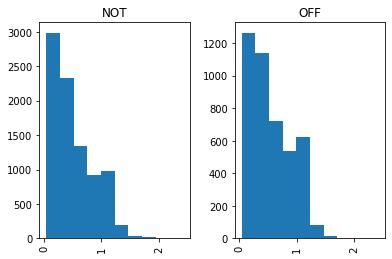

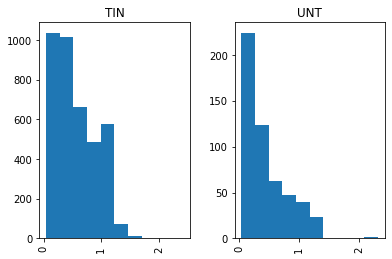

In [ ]:
tweets['comprimento_tweet'] = tweets.tweet.apply(get_tweet_length)
tweets.hist(column = 'comprimento_tweet', by= "subtask_a")
tweets.hist(column = 'comprimento_tweet', by= "subtask_b")

##### Contagem de palavras

In [8]:
def get_word_count(text):
  return len(text.split())

tweets.tweet.apply(get_word_count).head()

0    14
1    11
2    27
3    11
4    12
Name: tweet, dtype: int64

###### Histogramas


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd84ab65d30>,
      dtype=object)

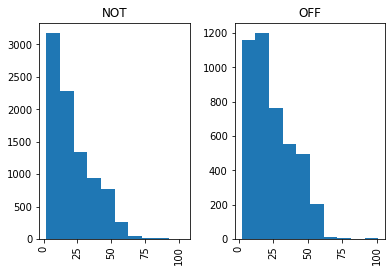

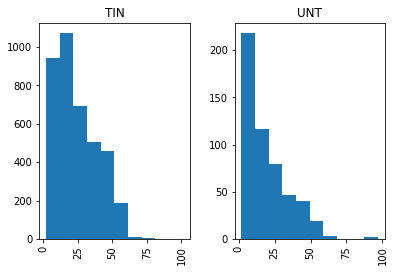

In [7]:
tweets['contagem_palavras'] = tweets.tweet.apply(get_word_count)
tweets.hist(column = 'contagem_palavras', by= "subtask_a")
tweets.hist(column = 'contagem_palavras', by= "subtask_b")

##### Comprimento médio das palavras

In [6]:
def get_avg_word_len(text):
  words = text.split()
  word_len = 0
  for word in words:
    word_len = word_len + len(word)
  return word_len/len(words)

tweets.tweet.apply(get_avg_word_len).head()

0    4.142857
1    5.181818
2    5.777778
3    5.000000
4    5.083333
Name: tweet, dtype: float64

###### Histogramas


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f78440c36a0>,
      dtype=object)

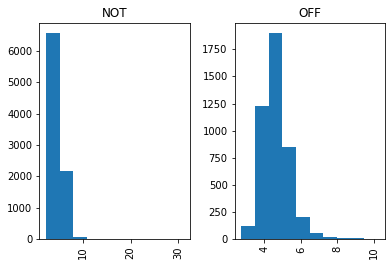

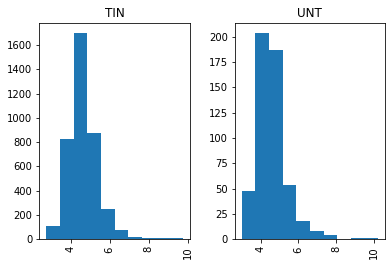

In [ ]:
tweets['avg_len'] = tweets.tweet.apply(get_avg_word_len)
tweets.hist(column = 'avg_len', by= "subtask_a")
tweets.hist(column = 'avg_len', by= "subtask_b")

##### Contagem de stop words

In [17]:
def get_stop_words_percent(text):
  return len([t for t in text.split() if t in STOP_WORDS])/len(text.split())


tweets.tweet.apply(get_stop_words_percent).head()

0    0.571429
1    0.000000
2    0.296296
3    0.363636
4    0.250000
Name: tweet, dtype: float64

###### Histogramas


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7825085fd0>,
      dtype=object)

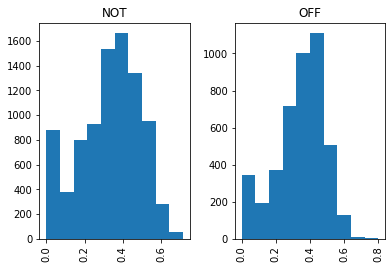

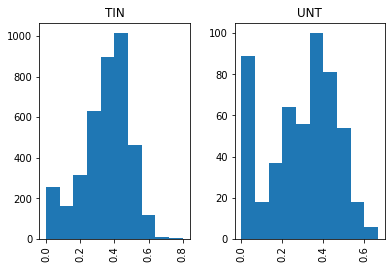

In [ ]:
tweets['sw_count'] = tweets.tweet.apply(get_stop_words_percent)
tweets.hist(column = 'sw_count', by= "subtask_a")
tweets.hist(column = 'sw_count', by= "subtask_b")

##### Percentual de #hashtags

In [9]:
def get_hashtag_percent(text):
  return len([t for t in text.split() if t.startswith("#")])/len(text.split())

tweets.tweet.apply(get_hashtag_percent).head()

0    0.000000
1    0.181818
2    0.185185
3    0.000000
4    0.000000
Name: tweet, dtype: float64

###### Histogramas

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7843361438>,
      dtype=object)

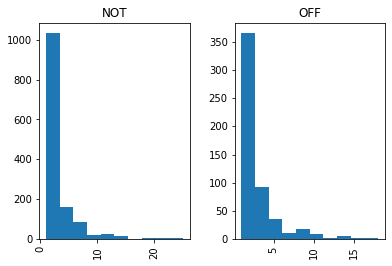

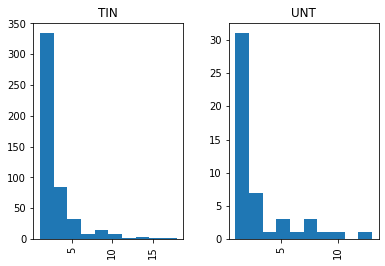

In [ ]:
tweets['hashtag_count'] = tweets.tweet.apply(get_hashtag_count)
tweets[tweets['hashtag_count'] > 0].hist(column = 'hashtag_count', by= "subtask_a")
tweets[tweets['hashtag_count'] > 0].hist(column = 'hashtag_count', by= "subtask_b")

##### Contagem de @menções

In [10]:
def get_mention_percent(text):
  return len([t for t in text.split() if t.startswith("@")])/len(text.split())

tweets.tweet.apply(get_mention_percent).head()

0    0.071429
1    0.272727
2    0.000000
3    0.090909
4    0.166667
Name: tweet, dtype: float64

###### Histogramas


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4a6c466a0>,
      dtype=object)

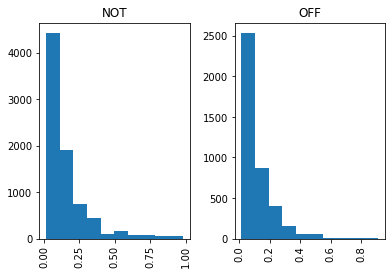

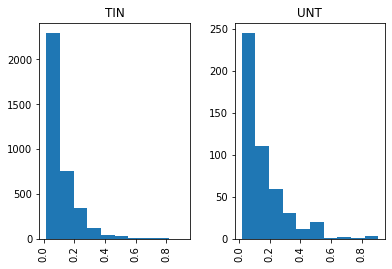

In [ ]:
tweets['mention_count'] = tweets.tweet.apply(get_mention_percent)
tweets[tweets['mention_count'] > 0].hist(column = 'mention_count', by= "subtask_a")
tweets[tweets['mention_count'] > 0].hist(column = 'mention_count', by= "subtask_b")

##### Contagem de palavras em MAIÚSCULO

In [11]:
def get_uppercase_percent(text):
  return len([t for t in text.split() if t.isupper()])/len(text.split())

tweets.tweet.apply(get_uppercase_percent).head()

0    0.071429
1    0.454545
2    0.185185
3    0.090909
4    0.166667
Name: tweet, dtype: float64

###### Histogramas


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7824e6aba8>,
      dtype=object)

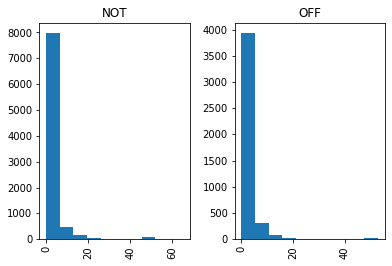

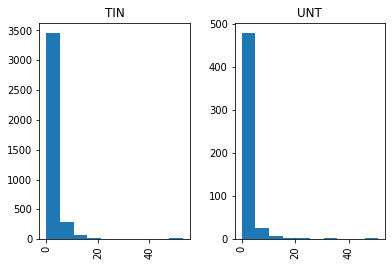

In [ ]:
tweets['upper_count'] = tweets.tweet.apply(get_uppercase_count)
tweets.hist(column = 'upper_count', by= "subtask_a")
tweets.hist(column = 'upper_count', by= "subtask_b")

##### Verificar se o tweet contém URL

In [12]:
def get_contain_url(text):

  return int('URL' in text )

tweets.tweet.apply(get_contain_url).head()

0    0
1    1
2    1
3    0
4    0
Name: tweet, dtype: int64

##### Contagem de sentenças

In [13]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
def sent_count(text):
  return len(sent_tokenize(text))
tweets.tweet.apply(sent_count).head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0    1
1    2
2    2
3    2
4    1
Name: tweet, dtype: int64

###### Histogramas

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7824b94c50>,
      dtype=object)

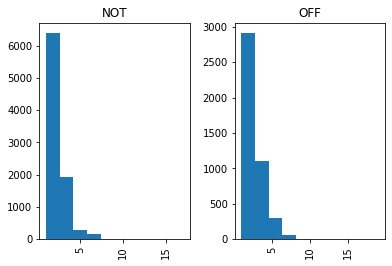

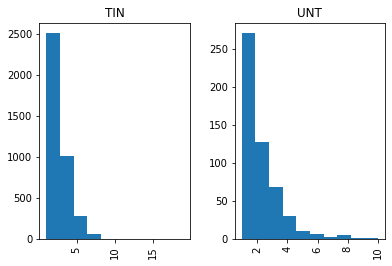

In [ ]:
tweets['sent_count'] = tweets.tweet.apply(sent_count)
tweets.hist(column = 'sent_count', by= "subtask_a")
tweets.hist(column = 'sent_count', by= "subtask_b")

##### Lista de tipos de entidades

In [63]:
def extract_entities(text):
  doc = nlp(text)
  lista_entities = ""
  if len(doc.ents) > 0:
    for token in doc:
      if len(token.ent_type_) > 0:
        lista_entities = lista_entities  + " " + token.ent_type_
  
  return lista_entities




##### Classificar como positivo ou negativo

In [ ]:
def classificar_positivo_negativo(text):

    doc = nlp(text)

    return doc.cats


{'NEGATIVE': 0.8799318075180054, 'POSITIVE': 0.7448988556861877}

##### Criação das features

In [148]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, StandardScaler
from sklearn.pipeline import Pipeline

class Criar_Features(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        

        return self
    def transform(self, X):

        features = pd.DataFrame(X)
        #Comprimento do tweet/240.0
        features['length'] = features['tweet'].apply(get_tweet_length)
        #Hashtag por tweet (%)
        features['hashtag_%'] = features['tweet'].apply(get_hashtag_percent)
        #Menções por tweet (%)
        features['mentions_%'] = features['tweet'].apply(get_mention_percent)
        #Stop words (%)
        features['stop_words_%'] = features['tweet'].apply(get_stop_words_percent)
        #upper case (%)
        features['uppercase_%'] =  features['tweet'].apply(get_uppercase_percent)
        #contagem de sentenças
        features['sent_count'] = features['tweet'].apply(sent_count)
        #contém url
        features['has_url'] = features['tweet'].apply(get_contain_url)
        #Extrai entidades
        features['entities'] = features['tweet'].apply(extract_entities)
        #classifica como positivo ou negativo
        features = features.join(features['tweet'].apply(classificar_positivo_negativo).apply(pd.Series))
        return features

# criar_features = Criar_Features()
# print(criar_features.fit_transform(tweets.tweet))

In [149]:
novas_features = Criar_Features().fit_transform(tweets.tweet)

In [ ]:
import spacy

from spacy_wordnet.wordnet_annotator import WordnetAnnotator 

# Load an spacy model (supported models are "es" and "en") 
nlp = spacy.load('en')
nlp.add_pipe(WordnetAnnotator(nlp.lang), after='tagger')


token = nlp('prices')[0]

# wordnet object link spacy token with nltk wordnet interface by giving acces to
# synsets and lemmas 
token._.wordnet.synsets()
token._.wordnet.lemmas()

# And automatically tags with wordnet domains
token._.wordnet.wordnet_domains()

# Imagine we want to enrich the following sentence with synonyms
sentence = nlp('I want to withdraw 5,000 euros')

# spaCy WordNet lets you find synonyms by domain of interest
# for example economy
economy_domains = ['finance', 'banking']
enriched_sentence = []

# For each token in the sentence
for token in sentence:
    # We get those synsets within the desired domains
    synsets = token._.wordnet.synsets()
    if synsets:
        lemmas_for_synset = []
        for s in synsets:
            # If we found a synset in the economy domains
            # we get the variants and add them to the enriched sentence
            lemmas_for_synset.extend(s.lemma_names())
            enriched_sentence.append('({})'.format('|'.join(set(lemmas_for_synset))))
    else:
        enriched_sentence.append(token.text)

# Let's see our enriched sentence
print(' '.join(enriched_sentence))
# >> I (need|want|require) to (draw|withdraw|draw_off|take_out) 5,000 euros

In [365]:
from sklearn.pipeline import FeatureUnion

pipeline_criar_features = FeatureUnion([
                                         
                                    ('features_basicas', criar_features_basicas),
                                    ('lista_entidades', listar_entidades)
    ])

pipeline_criar_features.fit_transform(tweets.tweet)

13240


array([[0.29583333333333334, 0.0, 0.07142857142857142, ..., 1.0, 0.0,
        ' NORP'],
       [0.2791666666666667, 0.18181818181818182, 0.2727272727272727, ...,
        2.0, 1.0, ' ORG'],
       [0.7583333333333333, 0.18518518518518517, 0.0, ..., 2.0, 1.0,
        ' ORG NORP ORDINAL'],
       ...,
       [0.2375, 0.0, 0.09090909090909091, ..., 2.0, 0.0, ''],
       [0.04583333333333333, 0.0, 0.5, ..., 1.0, 0.0, ''],
       [0.95, 0.3, 0.5333333333333333, ..., 1.0, 1.0,
        ' PERSON MONEY MONEY MONEY MONEY MONEY MONEY MONEY GPE ORG ORG ORG ORG ORG ORG ORG ORG ORG ORG ORG ORG ORG ORG ORG']],
      dtype=object)

### Preprocessamento e Limpeza


In [374]:
doc = nlp(tweets.tweet[352])
print([token for token in doc])

print(tweets.tweet[352])

[@USER, @USER, She, ’s, said, before, that, she, will, always, be, praying, for, him, even, tho, she, ca, n’t, do, anything, ., I, ’m, sure, she, is, heart, broken, as, well, at, the, events]
@USER @USER She’s said before that she will always be praying for him even tho she can’t do anything. I’m sure she is heart broken as well at the events


In [384]:
#Tokenizador
def tokenizar(sentence):
    doc = nlp(sentence)
    
    tokens = []
    for token in doc :
      if not token.is_punct:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)
    
    cleaned_tokens = []
    for token in tokens:
        if token not in STOP_WORDS :
            cleaned_tokens.append(token)
    return cleaned_tokens

In [385]:
i = 1
print(tweets.tweet[i])
print(tokenizar(tweets.tweet[i]))

@USER @USER Go home you’re drunk!!! @USER #MAGA #Trump2020 👊🇺🇸👊 URL
['@user', '@user', 'home', 'drunk', '@user', 'maga', 'trump2020', '👊', '🇺', '🇸', '👊', 'url']


In [368]:
#Tratamento básico
def tratamento_texto(text):
  text = text.lower()
  text = text.strip()
  #remove as menções a usuários de cada text
  #remove as palavras url
  text = re.sub(r'^url$', '', text, flags=re.MULTILINE)
  text = re.sub(r'^n$', 'and', text, flags=re.MULTILINE)
  text = re.sub(r'^u$', 'you', text, flags=re.MULTILINE)
  text = re.sub(r'^r$', 'are', text, flags=re.MULTILINE)
  text = re.sub(r'^sh*t$', 'shit', text, flags=re.MULTILINE)
  text = re.sub(r'&amp;', '', text, flags=re.MULTILINE)
  
  return text


def lemmatizar(text):
  return text


def remover_stop_words(text):
  pass

print(tweets.tweet.apply(tratamento_texto))


class Preprocessador(TransformerMixin):
    def transform(self, X, **transform_params):
      



      return [text.strip().lower() for text in X]
    def fit(self, X, y=None, **fit_params):
      return self
    def get_params(self, deep=True):
      return {}

#Preprocessador().fit_transform(X = tweets.tweet)

0        @user she should ask a few native americans wh...
1        @user @user go home you’re drunk!!! @user #mag...
2        amazon is investigating chinese employees who ...
3        @user someone should'vetaken" this piece of sh...
4        @user @user obama wanted liberals  illegals to...
                               ...                        
13235    @user sometimes i get strong vibes from people...
13236    benidorm ✅  creamfields ✅  maga ✅   not too sh...
13237    @user and why report this garbage.  we don't g...
13238                                          @user pussy
13239    #spanishrevenge vs. #justice #humanrights and ...
Name: tweet, Length: 13240, dtype: object


### Pipelines


#### Funções auxiliares

In [291]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names= []):
        self.attribute_names = attribute_names
        
        
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if len(self.attribute_names) == 1:
          
          return X.loc[:,self.attribute_names[0]]
        return X[self.attribute_names]


In [420]:
class Vetorizador_tfidf(BaseEstimator, TransformerMixin):
    def __init__(self, dataframe_completo, **args):
        self.tfidf_vectorizer = TfidfVectorizer(**args)
        self.dataframe_completo = dataframe_completo
        
    def fit(self, X, y=None):

        return self.tfidf_vectorizer.fit(self.dataframe_completo)
    def transform(self, X):
        
        return self.tfidf_vectorizer.transform(X)

treino = Vetorizador_tfidf(novas_features['tweet'], tokenizer=TweetTokenizer().tokenize).fit_transform(X_train['tweet'])
teste = Vetorizador_tfidf(novas_features['tweet'], tokenizer=TweetTokenizer().tokenize).fit_transform(X_test['tweet'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [421]:
treino.toarray().shape

(10724, 20971)

In [422]:
teste.toarray().shape

(2516, 20971)

In [388]:
from sklearn.preprocessing import FunctionTransformer
def pipelinizar(function, active=True):
    def list_comprehend_a_function(list_or_series, active=True):
        if active:
            return [function(i) for i in list_or_series]
        else: # if it's not active, just pass it right back
            return list_or_series
    return FunctionTransformer(list_comprehend_a_function, validate=False, kw_args={'active':active})

#### Pipeline vetorização do texto

In [423]:
from nltk.tokenize import TweetTokenizer
vetorizar_tweets = Pipeline([                                         
                                    ('selecionar_coluna', DataFrameSelector(['tweet'])),
                                    ('tratamento_inicial', pipelinizar(tratamento_texto, active = False)),
                                    
                                    ('vetorizar' , Vetorizador_tfidf(novas_features['tweet'], tokenizer=TweetTokenizer().tokenize))
    ])

vetorizar_tweets.fit_transform(novas_features).toarray().shape

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(13240, 20971)

#### Pipeline anexar embeddings

In [ ]:
def get_embeddings(text):
  doc = nlp(text)
  return doc.vector

vetorizar_tweets = Pipeline([                                         
                                    ('selecionar_coluna', DataFrameSelector(['tweet'])),
                                    ('tratamento_inicial', pipelinizar(tratamento_texto, active = False)),
                                    
                                    ('vetorizar' , TfidfVectorizer(tokenizer=TweetTokenizer().tokenize))
    ])

vetorizar_tweets.fit_transform(novas_features).toarray().shape

#### Pipeline vetor de entidades

In [373]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

anexar_entidades = Pipeline([('selecionar_coluna', DataFrameSelector(['entities'])),
                             ('vetorizar' , TfidfVectorizer())])

entidades.fit_transform(novas_features).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Pipeline features numéricas

In [363]:
class Features_Numericas(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names= []):
        self.attribute_names = attribute_names
        
        
    def fit(self, X, y=None):
        return self
    def transform(self, X):

        return X[X.dtypes[X.dtypes == 'float64'].index].values

features_numericas = Pipeline(steps= [('features_numericas', Features_Numericas())])
features_numericas.fit_transform(X_train)        

array([[0.25      , 0.        , 0.07692308, ..., 0.07692308, 0.61476129,
        0.83098227],
       [0.45833333, 0.        , 0.16666667, ..., 0.27777778, 0.36230931,
        0.52791739],
       [1.42916667, 0.        , 0.1641791 , ..., 0.17910448, 0.51244187,
        0.72631991],
       ...,
       [1.15833333, 0.05882353, 0.        , ..., 0.03921569, 0.74331135,
        0.90304589],
       [0.12083333, 0.        , 0.14285714, ..., 0.14285714, 0.28115585,
        0.40412575],
       [0.2375    , 0.09090909, 0.09090909, ..., 0.27272727, 0.19856912,
        0.22935019]])

In [ ]:
text = tweets.tweet[1]
doc = nlp(text)
# print(len(list(doc.sents)))
print(doc[0])
for token in doc:
  # print(token.lower_)
  print(token.lemma_)

In [ ]:
class ProcessamentoInicial(BaseEstimator, TransformerMixin):
  def __init__(self):
    return self
  def fit(self, X, y=None):
    
    return self
  def transform(self, X):




    return X

In [ ]:
from sklearn.preprocessing import FunctionTransformer



def pipelinizar(function, active=True):
    def list_comprehend_a_function(list_or_series, active=True):
        if active:
            return [function(i) for i in list_or_series]
        else: # if it's not active, just pass it right back
            return list_or_series
    return FunctionTransformer(list_comprehend_a_function, validate=False, kw_args={'active':active})

In [ ]:
import unicodedata
from sklearn.base import BaseEstimator, TransformerMixin
class TextNormalizer(BaseEstimator, TransformerMixin):
  def __init__(self, language='english'):
    self.stopwords = set(nltk.corpus.stopwords.words(language))
    self.lemmatizer = WordNetLemmatizer()
  def is_punct(self, token):
    return all(unicodedata.category(char).startswith('P') for char in token)
 
  def is_stopword(self, token):
    return token.lower() in self.stopwords
 
  def normalize(self, document):
    return [
      self.lemmatize(token, tag).lower()
      for paragraph in document
        for sentence in paragraph
          for (token, tag) in sentence
            if not self.is_punct(token) and not self.is_stopword(token)
    ]
  
  def lemmatize(self, token, pos_tag):
    tag = {
    'N': wn.NOUN,
    'V': wn.VERB,
    'R': wn.ADV,
    'J': wn.ADJ
    }.get(pos_tag[0], wn.NOUN)
    return self.lemmatizer.lemmatize(token, tag)
  
  
  def fit(self, X, y=None):
    return self
  def transform(self, documents):
    for document in documents:
      yield self.normalize(document)

### União das features


In [401]:
uniao_features = FeatureUnion([("vetores_entidades", anexar_entidades),
                               ("features_numericas", features_numericas),
                               ("vetorizar_tweets", vetorizar_tweets)],
                                
                              )

uniao_features.fit_transform(novas_features).toarray().shape

(13240, 20996)

In [403]:
uniao_features.fit_transform(X_train).toarray().shape

(10724, 18772)

### Subtask A

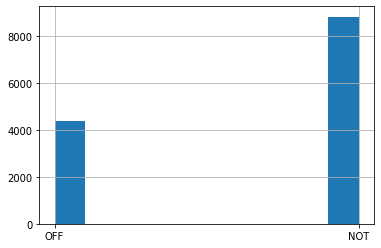

In [ ]:
tweets.subtask_a.fillna("NaN").hist()
# tweets.subtask_a.hist()

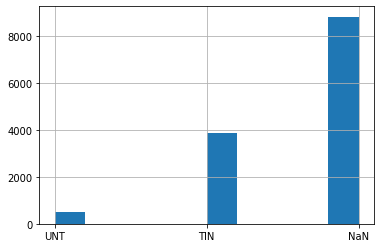

In [ ]:
tweets.subtask_b.fillna("NaN").hist()

#### Segregação de dados de treino e de teste

In [ ]:
tweets.subtask_a.value_counts()

NOT    8815
OFF    4392
Name: subtask_a, dtype: int64

In [ ]:
tweets.subtask_b.value_counts()

TIN    3869
UNT     523
Name: subtask_b, dtype: int64

In [362]:
#@title Seleção de parâmetros da separação de dados de teste e treino
test_size = 0.19 #@param {type:"slider", min:0, max:1, step:0.01}
target = "subtask_a" #@param ["subtask_a", "subtask_b"]
estratificar_alvo = True #@param {type:"boolean"}
remover_nan = True #@param {type:"boolean"}


from sklearn.model_selection import train_test_split

X = novas_features
if remover_nan:
  y = tweets[target].dropna()
  X = novas_features[tweets[target] == tweets[target]]
else:
  y = tweets[target].fillna("OFF")


stratify = None 
if estratificar_alvo == True:
  stratify = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify= stratify)

print("Quantidade de orbservações de teste: ", y_test.count())
print("Percentual por categoria")
print(y_test.value_counts()*100/y_test.count())
print('-------------')
print("Quantidade de orbservações de treino: ", y_train.count())
print("Percentual por categoria")
print(y_train.value_counts()*100/y_train.count())


Quantidade de orbservações de teste:  2516
Percentual por categoria
NOT    66.772655
OFF    33.227345
Name: subtask_a, dtype: float64
-------------
Quantidade de orbservações de treino:  10724
Percentual por categoria
NOT    66.766132
OFF    33.233868
Name: subtask_a, dtype: float64


##### Baseline


In [360]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

import nltk
tokenizer = nltk.casual.TweetTokenizer(preserve_case=False, reduce_len=True) 

count_vect = CountVectorizer(tokenizer=tokenizer.tokenize) 
classifier = LogisticRegression()

pipeline = Pipeline([
                    #('features', CriarFeatures()),
        ('vectorizer', uniao_features),
        ('classifier', classifier)
    ])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("F1 Score")
print(f1_score(y_test, y_pred, average='macro'))


F1 Score
0.46819338422391854


In [ ]:
y_pred

In [ ]:

from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import re
from sklearn.metrics import f1_score

def genericize_mentions(text):
    return re.sub(r'@[\w_-]+', 'thisisanatmention', text)

def get_tweet_length(text):
    return len(text)

def pipelinize(function, active=True):
    def list_comprehend_a_function(list_or_series, active=True):
        if active:
            return [function(i) for i in list_or_series]
        else: # if it's not active, just pass it right back
            return list_or_series
    return FunctionTransformer(list_comprehend_a_function, validate=False, kw_args={'active':active})

def reshape_a_feature_column(series):
    return np.reshape(np.asarray(series), (len(series), 1))

def pipelinize_feature(function, active=True):
    def list_comprehend_a_function(list_or_series, active=True):
        if active:
            processed = [function(i) for i in list_or_series]
            processed = reshape_a_feature_column(processed)
            return processed
#         This is incredibly stupid and hacky, but we need it to do a grid search.
#         If a feature is deactivated, we're going to just return a column of zeroes.
#         Zeroes shouldn't affect the regression, but other values may.
#         If you really want brownie points, consider pulling out that feature column later in the pipeline.
        else:
            return reshape_a_feature_column(np.zeros(len(list_or_series)))

    return FunctionTransformer(list_comprehend_a_function, validate=False, kw_args={'active':active})

def display_null_accuracy(y_test):
    value_counts = pd.value_counts(y_test)
    null_accuracy = max(value_counts) / float(len(y_test))
    print( 'null accuracy: %s' % '{:.2%}'.format(null_accuracy))
    return null_accuracy

def display_accuracy_score(y_test, y_pred_class):
    score = accuracy_score(y_test, y_pred_class)
    print ('accuracy score: %s' % '{:.2%}'.format(score))
    return score

def display_accuracy_difference(y_test, y_pred_class):
    null_accuracy = display_null_accuracy(y_test)
    accuracy_score = display_accuracy_score(y_test, y_pred_class)
    difference = accuracy_score - null_accuracy
    if difference > 0:
        print('model is %s more accurate than null accuracy' % '{:.2%}'.format(difference))
    elif difference < 0:
        print( 'model is %s less accurate than null accuracy' % '{:.2%}'.format(abs(difference)))
    elif difference == 0:
        print( 'model is exactly as accurate as null accuracy')
    return null_accuracy, accuracy_score

def train_test_and_evaluate(pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_pred_class = pipeline.predict(X_test)
    display_accuracy_difference(y_test, y_pred_class)

    print("F1 Score")
    print(f1_score(y_test, y_pred_class, average='macro'))
      
    return pipeline


In [ ]:
def spacy_tokenizer_lemmatizer(text):
    
    nlp = English()
    tokenizer = nlp.Defaults.create_tokenizer(nlp)
    tokens = tokenizer(text)
    
    lemma_list = []
    for token in tokens:
        if (token.is_stop and token.is_punct) is False :
            lemma_list.append(token.lemma_)
    
    return(lemma_list)

print(tweets.tweet[0])
spacy_tokenizer_lemmatizer(tweets.tweet[0])

@USER She should ask a few native Americans what their take on this is.


['@USER', 'ask', 'native', 'Americans']

#### União de features

In [ ]:
sentiment_pipeline = Pipeline([
        ('genericize_mentions', pipelinize(genericize_mentions, active=True)),
        ('features', FeatureUnion([
                    ('vectorizer', count_vect),
                    ('post_length', pipelinize_feature(get_tweet_length, active=True))
                ])),
        ('classifier', classifier)
    ])

In [ ]:
# custom features
# count vectorizer
# tfidf
# soma dos vetores das palavras

## rascunhos

In [ ]:
for sent in tweets['tokens_sem_stopwords'][0]:
  for palavra in sent:
    print(palavra)
    if len(wn.synsets(palavra))>0:
      print(wn.synsets(palavra)[0].hypernyms()[0].name())
    

def busca_hiperonimos(lista_sentencas_tokenizadas):
  dicionario_sinonimos = dict()
  dicionario_antonimos = dict()

  for sent in lista_sentencas_tokenizadas:
    for palavra in sent:
      sinonimos = []
      antonimos = []
      for syn  in wn.synsets(palavra):
        for l in syn.lemmas():
          if l.name() not in sinonimos:
            sinonimos.append(l.name()) 
          if l.antonyms():
              antonimos.append(l.antonyms()[0].name())
      if len(sinonimos) > 0:
        dicionario_sinonimos[palavra] = sinonimos
      if len(antonimos) > 0:
        dicionario_antonimos[palavra] = antonimos
    
  return dicionario_sinonimos, dicionario_antonimos



@user
ask
communicate.v.02
native
person.n.01
americans
inhabitant.n.01
take
income.n.01


In [ ]:
import unicodedata
from sklearn.base import BaseEstimator, TransformerMixin

class TextNormalizer(BaseEstimator, TransformerMixin):
  def __init__(self, language='english'):
    self.stopwords = set(nltk.corpus.stopwords.words(language))
    self.lemmatizer = WordNetLemmatizer()
  
  def is_punct(self, token):
    return all(
    unicodedata.category(char).startswith('P') for char in token)
  def is_stopword(self, token):
    return token.lower() in self.stopwords

  def normalize(self, document):

    return [
    self.lemmatize(token, tag).lower()
    for paragraph in document
    for sentence in paragraph
    for (token, tag) in sentence
    if not self.is_punct(token) and not self.is_stopword(token)
    ]


def lemmatize(self, token, pos_tag):
  tag = {
  'N': wn.NOUN,
  'V': wn.VERB,
  'R': wn.ADV,
  'J': wn.ADJ
  }.get(pos_tag[0], wn.NOUN)
  return self.lemmatizer.lemmatize(token, tag)

def fit(self, X, y=None):
  return self
def transform(self, documents):
  for document in documents:
    yield self.normalize(document)


In [ ]:
from sklearn.preprocessing import FunctionTransformer
def pipelinize(function, active=True):
    def list_comprehend_a_function(list_or_series, active=True):
        if active:
            return [function(i) for i in list_or_series]
        else: # if it's not active, just pass it right back
            return list_or_series
    return FunctionTransformer(list_comprehend_a_function, validate=False, kw_args={'active':active})